In [1]:
import os
import tempfile

from csimpy import core as csim

from biosimulators_utils.config import get_config
from biosimulators_utils.report import data_model as report_data_model
from biosimulators_utils.viz import data_model as viz_data_model

In [2]:
config = get_config()
config.REPORT_FORMATS = [report_data_model.ReportFormat.csv]
config.VIZ_FORMATS = [viz_data_model.VizFormat.png]
config.BUNDLE_OUTPUTS = False
config.KEEP_INDIVIDUAL_OUTPUTS = True
config.LOG = False
config.VERBOSE = False
config.DEBUG = True

In [3]:
sedml_root = os.path.join('tests', 'fixtures')
sedml_doc = os.path.join(sedml_root, 'sine_approximations_import.sedml')
output_root = os.path.join(sedml_root, 'output', 'sine_approximations_import.sedml')

In [4]:
%%capture execution_log
results, log = csim.exec_sed_doc(sedml_doc, sedml_root, output_root, config=config)

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='xDataGenerator1_3'>

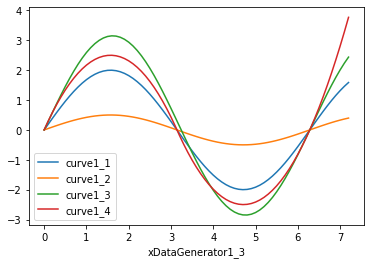

In [6]:
plot1_csv = os.path.join(output_root, 'plot1.csv')
plot1 = pd.read_csv(plot1_csv, index_col=0, header=None).T
axs = plot1.plot.line(y='yDataGenerator1_1', x='xDataGenerator1_1', label='curve1_1')
plot1.plot.line(y='yDataGenerator1_1_mod', x='xDataGenerator1_1', label='curve1_2', ax=axs)
plot1.plot.line(y='yDataGenerator1_2', x='xDataGenerator1_2', label='curve1_3', ax=axs)
plot1.plot.line(y='yDataGenerator1_3', x='xDataGenerator1_3', label='curve1_4', ax=axs)


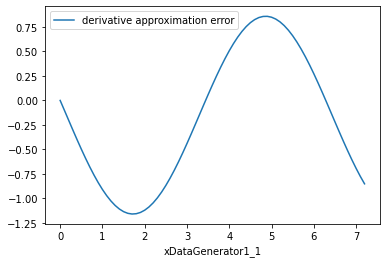

In [7]:
plot2_csv = os.path.join(output_root, 'plot2.csv')
plot2 = pd.read_csv(plot2_csv, index_col=0, header=None).T
axs = plot2.plot.line(y='deriv_error', x='xDataGenerator1_1', label='derivative approximation error')
